# Figure Example Code

Data from:

Jingke Xu, Sergey Pereverzev, Brian Lenardo, James Kingston, Daniel Naim, Adam Bernstein, Kareem Kazkaz and Mani Tripathi. "Electron extraction efficiency study for dual-phase xenon dark matter experiments" *Phys. Rev. D* 99, 103024 (2019)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
#The data for Figure 8/10 all jumbled

mess = [2.12926829,0.11624022,0.07476363,0.00438275,2.55512195,0.13652548,0.19759567,0.00916326,2.98097561,0.15715877,
        0.35929688,0.01337612,3.40682927,0.17801914,0.51215225,0.01643466,3.83268293,0.19903518,0.65837705,0.0111116,
        4.25853659,0.22016233,0.7365963,0.00780973,4.68439024,0.24137141,0.7988378,0.00961722,5.1102439,0.26264257,
        0.86022844,0.00728244,5.53609756,0.28396186,0.88184667,0.01050783,5.96195122,0.30531921,0.93902311,0.00750854,
        6.38780488,0.32670714,0.96285284,0.01148459,6.81365854,0.34812002,0.96982465,0.00922245,7.2395122,0.36955351,
        0.99225212,0.01315965,7.45243902,0.3802769,1.00960383,0.0139671,7.66536585,0.39100423,0.99390985,0.01315943,
        7.87829268,0.40173519,1.0152172,0.01350644,8.09121951,0.41246948,1.01382653,0.01285832,8.30414634,0.42320687,
        1.00337135,0.01404002,8.51707317,0.43394712,1.00011442,0.00903405,2.96341463,0.17775545,0.27940613,0.00936539,
        3.21036585,0.19143814,0.37921466,0.01141922,3.45731707,0.2051932,0.44857851,0.01235919,3.70426829,0.21900699,
        0.53757709,0.01349437,3.95121951,0.23286906,0.61624791,0.01462356,4.19817073,0.24677128,0.71087939,0.010278,
        4.44512195,0.26070721,0.74175776,0.0075665,4.69207317,0.27467174,0.80892411,0.01037796,4.93902439,0.2886607,
        0.83806101,0.00754871,5.18597561,0.30267072,0.9006388,0.01183954,5.43292683,0.31669899,0.89139832,0.00762923,
        5.67987805,0.3307432,0.93868417,0.01140704,5.92682927,0.34480139,0.9238753,0.00820563,6.17378049,0.35887193,
        0.95986696,0.0114418,6.42073171,0.37295342,0.93555783,0.00796216,6.66768293,0.38704465,0.95699481,0.01167647,
        6.91463415,0.40114461,0.95378983,0.00840932,7.16158537,0.41525241,0.9685308,0.01164948,7.40853659,0.42936727,
        0.97074249,0.0111751,7.6554878,0.44348851,0.97671637,0.01131624,7.90243902,0.45761556,0.98732079,0.01159559,
        8.14939024,0.47174788,0.98383964,0.01127362,8.39634146,0.48588502,0.98081781,0.00797721,8.64329268,0.50002656,
        0.9809945,0.01150652,8.8902439,0.51417215,0.99482125,0.0114582,9.13719512,0.52832146,1.00170588,0.01196058,
        9.38414634,0.54247419,1.0066335,0.00754382,9.63109756,0.55663009,1.0041201,0.0117757,9.87804878,0.57078893,
        1.00191099,0.01146165,10.125,0.58495048,1.00802703,0.01117782,10.3719512,0.59911455,1.03247619,0.01147875]



EFcorr = np.asarray(mess[0::4])

EFerrSum = mess[1::4]

EEE = np.asarray(mess[2::4])

EEEerr = mess[3::4]



In [3]:
#Fit [:19] in reverse because the function is a roll-off 
def roll_off(x,steep,offset):
    return 1 - (1/(1 + np.exp(-(x-offset)/steep)))

param, cov = curve_fit(roll_off,EFcorr[:19],np.ones(len(EEE[:19])) - EEE[:19], p0 = [1,4])
print(param)


[0.76893512 3.48686934]


<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
/var/folders/4g/t47fn81n7kb23j5m1zcdp59h0000gn/T/ipykernel_18571/2095957999.py:21: SyntaxWarning: invalid escape sequence '\s'
  ax1.set_ylabel('$\sigma$', fontsize = 20)


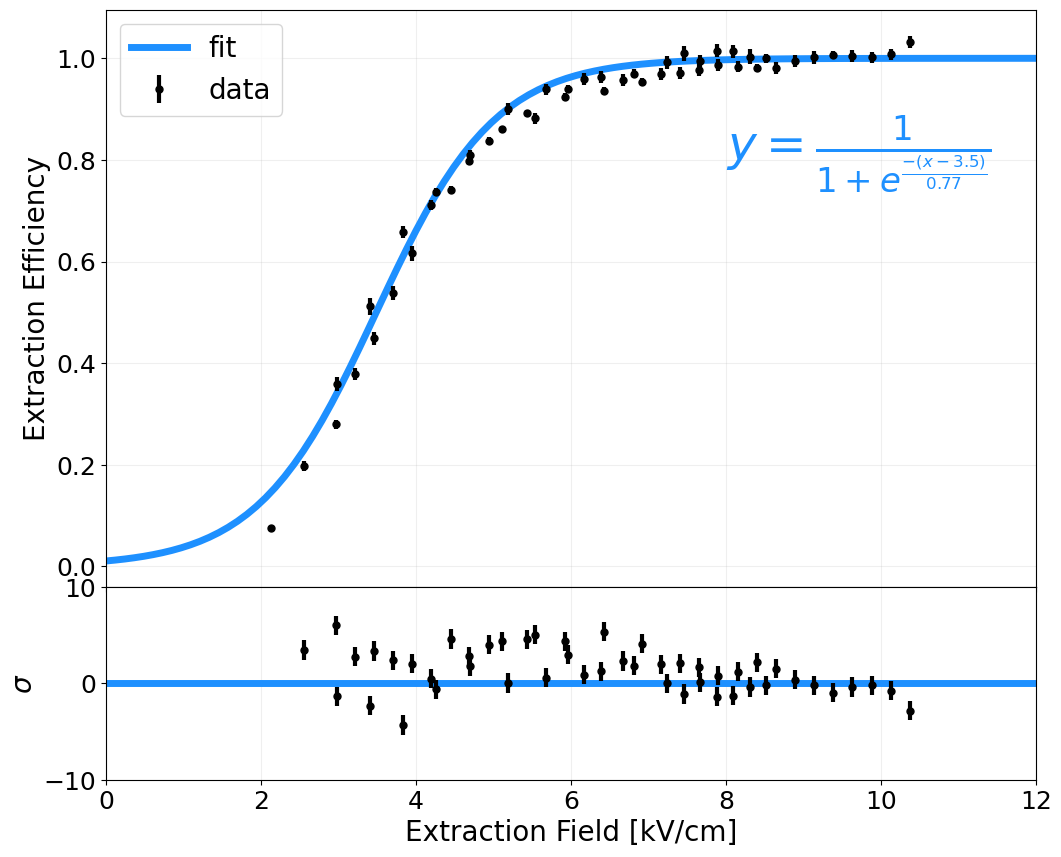

In [4]:
#Figure
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, sharex=True,figsize = [12,10])

xs = np.linspace(0,12,100)
ax0.plot(xs,1- roll_off(xs,param[0],param[1]), linewidth = 5,color = 'dodgerblue', 
         label = 'fit')
ax0.errorbar(EFcorr, EEE,yerr = EEEerr, marker = '.',linewidth = 3, markersize = 10, color = 'black', linestyle = ' ',label = 'data')
ax0.tick_params(labelsize = 18)
ax0.legend(fontsize = 20)
ax0.set_ylabel('Extraction Efficiency',fontsize = 20)
ax0.annotate(r'$y = \frac{1}{1+e^{\frac{-(x - %.1f)}{%.2f}}}$'%(param[1],param[0]),[8,0.8], fontsize = 35, color ='dodgerblue', rotation = 0)
ax0.grid(alpha = 0.2)

plt.xlim(0,12)
plt.xlabel('Extraction Field [kV/cm]',fontsize = 20)
plt.xticks(fontsize = 18)

ax1.hlines(0,0,12,linewidth = 5,color = 'dodgerblue')
ax1.errorbar(EFcorr,((1-roll_off(EFcorr,*param))-EEE)/(EEEerr),yerr=np.ones(len(EEE)),linestyle = ' ',marker = '.', linewidth = 3, markersize = 10, color = 'black')
ax1.tick_params(labelsize = 18)
ax1.set_ylabel('$\sigma$', fontsize = 20)
ax1.set_ylim(-10,10)
ax1.grid(alpha = 0.2)
plt.subplots_adjust(hspace=0)
# plt.show()
# f.savefig('eee_vs_voltage.pdf')